# Your Title Here

**Name(s)**: Colin Czarnik and Arthur Yang

**Website Link**: (your website link)

In [59]:
import pandas as pd
import numpy as np

import plotly.express as px
pd.options.plotting.backend = 'plotly'

from lec_utils import * # Feel free to uncomment and use this. It'll make your plotly graphs look like ours in lecture!

## Step 1: Introduction

In [60]:
# TODO
recipes = pd.read_csv('RAW_recipes.csv')
interactions = pd.read_csv('RAW_interactions.csv')


In [61]:
(recipes['submitted'] > '2008').sum()

83782

In [62]:
interactions.head()

user_id  recipe_id        date  rating  \
0     1293707      40893  2011-12-21       5   
1      126440      85009  2010-02-27       5   
2       57222      85009  2011-10-01       5   
3      124416     120345  2011-08-06       0   
4  2000192946     120345  2015-05-10       2   

                                              review  
0  So simple, so delicious! Great for chilly fall...  
1  I made the Mexican topping and took it to bunk...  
2  Made the cheddar bacon topping, adding a sprin...  
3  Just an observation, so I will not rate.  I fo...  
4  This recipe was OVERLY too sweet.  I would sta...

In [63]:
# merge tables on recipe id
merged = recipes.merge(interactions, how='left', left_on="id", right_on="recipe_id")
merged.shape

(234429, 17)

In [64]:
merged.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'user_id', 'recipe_id', 'date', 'rating', 'review'],
      dtype='object')

In [65]:
# this shows ratings of 0 mean that the person didn't rate the recipe, not that thy hated it.
merged[merged['rating']== 0]['review'].iloc[10]

'Gelatin is not a vegetarian food product.'

In [66]:
merged['rating'] = merged['rating'].replace(0, np.nan)
merged.head()

name      id  minutes  contributor_id  ...  \
0  1 brownies in the world    best ever  333281       40          985201  ...   
1    1 in canada chocolate chip cookies  453467       45         1848091  ...   
2                412 broccoli casserole  306168       40           50969  ...   
3                412 broccoli casserole  306168       40           50969  ...   
4                412 broccoli casserole  306168       40           50969  ...   

  recipe_id        date rating  \
0  333281.0  2008-11-19    4.0   
1  453467.0  2012-01-26    5.0   
2  306168.0  2008-12-31    5.0   
3  306168.0  2009-04-13    5.0   
4  306168.0  2013-08-02    5.0   

                                              review  
0  These were pretty good, but took forever to ba...  
1  Originally I was gonna cut the recipe in half ...  
2  This was one of the best broccoli casseroles t...  
3  I made this for my son's first birthday party ...  
4  Loved this.  Be sure to completely thaw the br...  

[5 rows x 17 columns]

In [67]:
avg_ratings = merged.groupby('recipe_id')['rating'].mean().sort_values()
avg_ratings = avg_ratings.to_frame().rename(columns={'rating':'avg_rating'})
avg_ratings.head()

avg_rating
recipe_id            
469990.0          1.0
423015.0          1.0
416845.0          1.0
468835.0          1.0
289197.0          1.0

In [68]:
merged = merged.merge(avg_ratings,on='recipe_id')
merged.head()

name      id  minutes  contributor_id  ...  \
0  1 brownies in the world    best ever  333281       40          985201  ...   
1    1 in canada chocolate chip cookies  453467       45         1848091  ...   
2                412 broccoli casserole  306168       40           50969  ...   
3                412 broccoli casserole  306168       40           50969  ...   
4                412 broccoli casserole  306168       40           50969  ...   

         date rating                                             review  \
0  2008-11-19    4.0  These were pretty good, but took forever to ba...   
1  2012-01-26    5.0  Originally I was gonna cut the recipe in half ...   
2  2008-12-31    5.0  This was one of the best broccoli casseroles t...   
3  2009-04-13    5.0  I made this for my son's first birthday party ...   
4  2013-08-02    5.0  Loved this.  Be sure to completely thaw the br...   

   avg_rating  
0         4.0  
1         5.0  
2         5.0  
3         5.0  
4         5.0  

[5 rows x 18 columns]

## Step 2: Data Cleaning and Exploratory Data Analysis

In [69]:
# TODO
merged['steps'].iloc[0]

"['heat the oven to 350f and arrange the rack in the middle', 'line an 8-by-8-inch glass baking dish with aluminum foil', 'combine chocolate and butter in a medium saucepan and cook over medium-low heat , stirring frequently , until evenly melted', 'remove from heat and let cool to room temperature', 'combine eggs , sugar , cocoa powder , vanilla extract , espresso , and salt in a large bowl and briefly stir until just evenly incorporated', 'add cooled chocolate and mix until uniform in color', 'add flour and stir until just incorporated', 'transfer batter to the prepared baking dish', 'bake until a tester inserted in the center of the brownies comes out clean , about 25 to 30 minutes', 'remove from the oven and cool completely before cutting']"

In [70]:
import re
# convert a string resembling a list of floats into an actual list of floats (for nutrition column)
def string_to_float_list(s):
    return [float(i) for i in re.findall('\d+\.\d', s)]

# convert a string resembling a list of strings into a list of strings (for tags and steps columns)
def string_to_string_list(s):
    return re.findall('\'(.+?)\'', s)


In [71]:
# TODO
merged['nutrition'] = merged['nutrition'].apply(string_to_float_list)
# merged['nutrition']

In [72]:
merged['steps'] = merged['steps'].apply(string_to_string_list)
merged['tags'] = merged['tags'].apply(string_to_string_list)

In [73]:
merged[merged['minutes'] == 1051200]

name      id  minutes  contributor_id  ...  \
109931  how to preserve a husband  447963  1051200          576273  ...   
109932  how to preserve a husband  447963  1051200          576273  ...   

              date rating                                             review  \
109931  2011-03-10    5.0  I'd thought that I would like to keep mine in ...   
109932  2011-04-08    5.0  No matter if you've got the basic, no-frills m...   

        avg_rating  
109931         5.0  
109932         5.0  

[2 rows x 18 columns]

In [74]:
merged = merged.drop(range(109931, 109933))
merged[merged['minutes'] == 1051200]

Empty DataFrame
Columns: [name, id, minutes, contributor_id, submitted, tags, nutrition, n_steps, steps, description, ingredients, n_ingredients, user_id, recipe_id, date, rating, review, avg_rating]
Index: []

[0 rows x 18 columns]

In [75]:
merged.groupby('recipe_id')[['avg_rating','minutes']].mean().sort_values("minutes")

avg_rating   minutes
recipe_id                      
282837.0          5.0       0.0
313491.0          5.0       1.0
432948.0          5.0       1.0
...               ...       ...
463624.0          NaN  129600.0
425681.0          5.0  259205.0
291571.0          4.0  288000.0

[83780 rows x 2 columns]

In [76]:
merged[merged['minutes'] >= 259000]

name      id  minutes  contributor_id  ...  \
106700  homemade fruit liquers  291571   288000          553251  ...   
107394        homemade vanilla  425681   259205           28177  ...   

              date rating                                             review  \
106700  2008-03-13    4.0  Thanks for the extra tip about citrus liquers ...   
107394  2011-01-14    5.0  This is how I have been making vanilla for sev...   

        avg_rating  
106700         4.0  
107394         5.0  

[2 rows x 18 columns]

In [77]:
merged.loc[106700, 'steps']

['rinse the fruit or berries , fruit must be cut into small pieces',
 'place berries or fruit in a container , add vodka',
 'cap and store in a cool , dark place , stir once a week for 2 - 4 weeks',
 'strain through metal colander',
 'transfer the unsweetened liqueur to an aging container',
 'to 3 cups ml unsweetened liqueur add 1 1 / 4 cup granulated sugar',
 'let age for at least three months',
 'pour carefully the clear liqueur to a new bottle',
 'add more sugar if necessary',
 'the flavor of almost all liqueurs improves during storage',
 'fruit and berry liqueurs should be stored for at least 6 months for maximum taste',
 'some lemon liqueurs should not be stored for a long time']

In [78]:
merged = merged.assign(calories=merged['nutrition'].str[0])

In [79]:
merged.groupby('recipe_id')[['avg_rating','calories']].mean().sort_values("calories")


avg_rating  calories
recipe_id                      
382813.0          5.0       0.0
484759.0          5.0       0.0
446730.0          1.0       0.0
...               ...       ...
313271.0          5.0   28930.2
319406.0          5.0   36188.8
392286.0          5.0   45609.0

[83780 rows x 2 columns]

In [80]:
fig = px.histogram(merged.groupby('recipe_id')['avg_rating'].mean(), x='avg_rating', nbins=20)
fig.show()

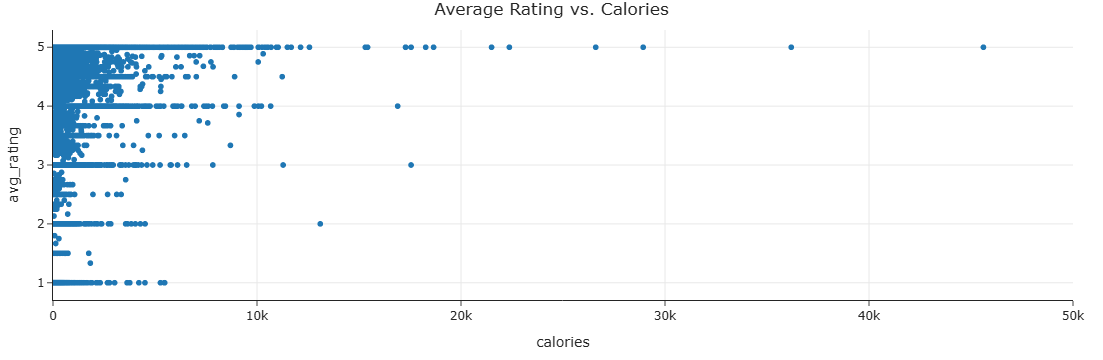

In [81]:
fig1 = px.scatter(merged.groupby('recipe_id')[['avg_rating','calories']].mean(), x='calories', y='avg_rating', range_x=[0, 50000], title='Average Rating vs. Calories')
fig1.show()

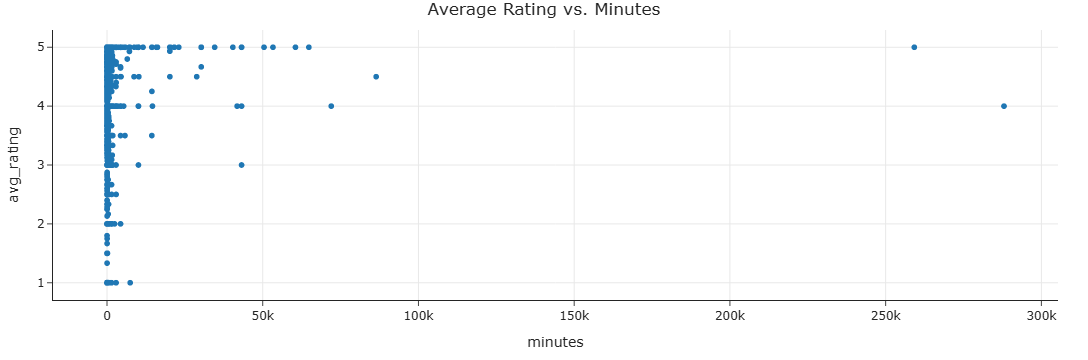

In [82]:
fig1 = px.scatter(merged.groupby('recipe_id')[['avg_rating','minutes']].mean(), x='minutes', y='avg_rating', title='Average Rating vs. Minutes')
fig1.show()

In [83]:
all_tags = []
for tags in merged['tags']:
    for tag in tags:
        if tag not in all_tags:
            all_tags.append(tag)

len(all_tags)

548

In [84]:
merged['tags'].iloc[0]

['60-minutes-or-less',
 'time-to-make',
 'course',
 'main-ingredient',
 'preparation',
 'for-large-groups',
 'desserts',
 'lunch',
 'snacks',
 'cookies-and-brownies',
 'chocolate',
 'bar-cookies',
 'brownies',
 'number-of-servings']

## Step 3: Framing a Prediction Problem

In [86]:
# TODO
pd.DataFrame(merged.groupby('id')['review'].sum().dropna())

review
id                                                       
275022  Easy comfort food! I definitely thought it was...
275024  When I found myself needing a dessert and havi...
275026  Sorry, this one didn&#039;t work out so well. ...
...                                                   ...
537543  I Didn't see pumpkin puree in ingredients just...
537671  These are an absolute work of art, but just to...
537716  These were the best game day sandwiches. I cou...

[83780 rows x 1 columns]

In [87]:
from sklearn.pipeline import make_pipeline, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import GridSearchCV

In [88]:
merged_drop = merged.dropna()
pipe_tfidf = make_pipeline(FunctionTransformer(lambda df: df['review']), TfidfVectorizer(max_features=1000), ElasticNet(alpha=.0000591))
pipe_tfidf.fit(X=pd.DataFrame(merged_drop.groupby('id')['review'].sum()),y=merged_drop.groupby('id')['avg_rating'].max())
pipe_tfidf.named_steps['tfidfvectorizer'].get_feature_names_out()[pipe_tfidf.named_steps['elasticnet'].coef_[0] != 0]

array([['039', '09', '10', ..., 'zwt5', 'zwt6', 'zwt8']], dtype=object)

In [ ]:
len(pipe_tfidf.named_steps['tfidfvectorizer'].get_feature_names_out()[pipe_tfidf.named_steps['elasticnet'].coef_[0] != 0][0])

In [ ]:
merged_drop = merged.dropna()
pipe_tfidf = make_pipeline(FunctionTransformer(lambda df: df['review']), TfidfVectorizer(max_features=1000), Lasso(alpha=.00003))
pipe_tfidf.fit(X=pd.DataFrame(merged_drop.groupby('id')['review'].sum()),y=merged_drop.groupby('id')['avg_rating'].max())

In [ ]:
len(pipe_tfidf.named_steps['tfidfvectorizer'].get_feature_names_out()[pipe_tfidf.named_steps['lasso'].coef_[0] != 0][0])

In [ ]:
from sklearn.pipeline import make_pipeline, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.model_selection import GridSearchCV


merged_drop = merged.dropna()
alpha_low = .000
alpha = .00025
alpha_high = .001
while True:
    print(alpha)
    pipe_tfidf = make_pipeline(FunctionTransformer(lambda df: df['review']), TfidfVectorizer(max_features=1000), ElasticNet(alpha=alpha))
    pipe_tfidf.fit(X=pd.DataFrame(merged_drop.groupby('id')['review'].sum()),y=merged_drop.groupby('id')['avg_rating'].max())
    if len(pipe_tfidf.named_steps['tfidfvectorizer'].get_feature_names_out()[pipe_tfidf.named_steps['elasticnet'].coef_[0] != 0]) == 0:
        alpha_high = alpha
        alpha = (alpha + alpha_low) / 2
    elif len(pipe_tfidf.named_steps['tfidfvectorizer'].get_feature_names_out()[pipe_tfidf.named_steps['elasticnet'].coef_[0] != 0][0]) == 1000: 
        alpha_low = alpha
        alpha = (alpha + alpha_high) / 2
    elif abs(alpha_low - alpha_high) < .0000001:
        print('didn't converge')
        break
    else:
        print('finished!')
        break
        
"""cv_tfidf = GridSearchCV(
        estimator=make_pipeline(TfidfVectorizer(max_features=5000), Lasso(max_iter=10000)),
        param_grid=hyperparams,
        scoring='neg_mean_squared_error'
)
cv_tfidf.fit(X=merged_drop.groupby('id')['review'].sum(),y=merged_drop.groupby('id')['avg_rating'].max())"""

In [ ]:
# TODO
#cv_tfidf.named_steps['tfidfvectorizer'].get_feature_names_out()[cv_tfidf.named_steps['lasso'].coef_[0] != 0]
#len(pipe_tfidf.named_steps['tfidfvectorizer'].get_feature_names_out()[pipe_tfidf.named_steps['lasso'].coef_[0] != 0])
# 0.000004361064454242545839488324 0.000004361064454242545839488324 0.000004361064454242546686521271
print(format(alpha_low, '.30f'))
print(format(alpha, '.30f'))
print(format(alpha_high, '.30f')) #, alpha, alpha_high format(x, '.30f')

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged_drop.groupby('id')[['calories', 'minutes','tags','review']].agg({'calories':max, 'minutes':max, "tags":max, 'review':sum}),merged_drop.groupby('id')['avg_rating'].first(), random_state=98)

In [121]:
pipe_tfidf_split = make_pipeline(FunctionTransformer(lambda df: df['review']), TfidfVectorizer(max_features=1000), ElasticNet(alpha=.00005))
pipe_tfidf_split.fit(X=X_train,y=y_train)
pipe_tfidf_split.named_steps['elasticnet'].coef_

array([-0.  , -0.  ,  0.05, ...,  0.04,  0.22,  0.11])

In [122]:
from sklearn.metrics import mean_squared_error
def calculate_mse(preds, ys):
    total = 0
    for i in range(len(ys)):
        total += (ys.iloc[i] - preds[i])**2

    return total / len(ys)

In [123]:
tfidf_train_preds = pipe_tfidf_split.predict(X_train)
tfidf_test_preds = pipe_tfidf_split.predict(X_test)

mean_squared_error(tfidf_train_preds, y_train), mean_squared_error(tfidf_test_preds, y_test)

(0.257015809852176, 0.2616669917502652)

In [132]:
mean_squared_error([y_train.mean() for i in range(len(y_train))], y_train)

0.4111889371156222

In [133]:
from sklearn.compose import ColumnTransformer, make_column_transformer
log_tf = FunctionTransformer(lambda x: np.log1p(x))
base = make_pipeline(make_column_transformer((log_tf, ['calories', 'minutes']), remainder='drop'), LinearRegression())
base.fit(X=X_train[['calories', 'minutes']], y=y_train)
base_train_preds = base.predict(X_train[['calories', 'minutes']])
base_test_preds = base.predict(X_test[['calories', 'minutes']])
mean_squared_error(base_train_preds, y_train), mean_squared_error(base_test_preds, y_test)

(0.41065814448183796, 0.4072583575450741)

## Step 5: Final Model

In [26]:
# TODO